<a href="https://colab.research.google.com/github/Nicolas-HGS/Images-Digital-Processing/blob/main/Erosion_and_dilation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importação das bibliotecas

import cv2
import numpy
from matplotlib import pyplot as plt

# DEFINE A VARIÁVEL Img COMO SENDO UM NDARRAY (N-DIMENSIONAL ARRAY) A PARTIR DO CARREGAMENTO DA IMAGEM CONTIDA
# NO ARQUIVO "imagem_30.jpg" no modo "grayscale"

imagem = cv2.imread("imagem_30.jpg", cv2.IMREAD_GRAYSCALE)

In [4]:
#### VARIÁVEL PARA O PROCESSO DE EROSÃO

# Criação de uma variável para sofrer o processo de erosão
# Observar que foram acrescidas bordas nas imagens e todos os pixels tem intensidade 255,
# já que a técnica procura pelos menores valores de intensidades dos pixels enquanto varre a imagem,
# e, dessa forma, os valores da borda não influenciarão

imagem_transformada = 255*numpy.ones((imagem.shape[0]+2,imagem.shape[1]+2), dtype = 'uint8')

In [ ]:
#### VARIÁVEL PARA O PROCESSO DE DILATAÇÃO

# Criação de uma variável para sofrer o processo de dilatação
# Observar que foram acrescidas bordas nas imagens e todos os pixels tem intensidade 0,
# já que a técnica procura pelos maiores valores de intensidades dos pixels enquanto varre a imagem, e,
# dessa forma, os valores da borda não influenciarão

imagem_transformada = 0*numpy.ones((imagem.shape[0]+2,imagem.shape[1]+2), dtype = 'uint8')

In [5]:
# Atribui à parte interna da variável imagem_transformada o conteúdo da variável imagem

imagem_transformada[1:-1,1:-1] = imagem

# Cria uma variável para armazenar a imagem após a aplicação da técnica

imagem_copia_2 = imagem_transformada.copy()

# Criação da máscara para percorrer a imagem, observar que todos os seus elementos são iguais a um,
# para realizar a seleção do menor elemento(erosão)/maior elemento(dilatação)
# da região em que ela estiver na imagem durante a varredura

Mascara = numpy.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])

# Variável que armazena a quantidade de execuções da técnica

N = 1

# Variável que será incrementada até atingir o número de execuções desejada

i=0

# Lista que armazena os valores das multiplicações realizadas entre os elementos da máscara e os valores de intensidade dos pixels da imagem

lista_de_produtos = []

In [6]:
# Criação do loop para a execução da técnica

while (i < N): # Verifica a quantidade de execuções da técnica
    # Varredura das colunas, observar o início e o fim do intervalo de varredura e tentar entender o motivo
    for y in range(1, imagem_transformada.shape[1]-1):
        # Varredura das linhas, observar o início e o fim do intervalo de varredura e tentar entender o motivo
        for x in range(1, imagem_transformada.shape[0]-1):

            # Loops para a execução da multiplicação entre os elementos da máscara e as intensidades dos pixels

            for y_mascara in range(-1, 2):
                for x_mascara in range(-1, 2):
                    # Seleciona a intensidade do pixel que será multiplicada através da sua posição
                    a = (imagem_copia_2[x + x_mascara, y + y_mascara])
                    # Seleciona o elemento correspondente da máscara em relação ao pixel para realizar
                    # a multiplicação
                    b = (Mascara[x_mascara+1, y_mascara+1])
                    # Armazena a multiplicação entre o elemento da máscara e a intensidade do pixel selecionado
                    lista_de_produtos.append(a*b)
            ## Atribui ao pixel atual da varredura o menor valor encontrado na multiplicação entre os elementos
            ## da máscara e as intensidades dos pixels ao redor do pixel atual, incluindo ele - EROSÃO
            imagem_transformada[x,y] = min(lista_de_produtos)

            # # Atribui ao pixel atual da varredura o MAIOR valor encontrado na multiplicação entre os elementos
            # # da máscara e as intensidades dos pixels ao redor do pixel atual, incluindo ele - DILATAÇÃO
            # imagem_transformada[x, y] = max(lista_de_produtos)

            lista_de_produtos = [] # Esvazia a variável lista_de_produtos para a próxima iteração
    # Armazenamento do resultado do processo de erosão, para que seja utilizado na próxima execução
    imagem_copia_2 = imagem_transformada.copy()
    i = i + 1 # Incremento da quantidade de execuções

# Atribui à variável imagem_copia_2 apenas a parte erodida, sem as bordas adicionadas

imagem_copia_2 = imagem_copia_2[1:-1,1:-1]

In [7]:
# Realização do processo de erosão através de uma função da biblioteca opencv

imagem_transformada_biblioteca = cv2.erode(imagem, Mascara, iterations=N)

In [ ]:
# # Realização do processo de dilatação através de uma função da biblioteca opencv

imagem_transformada_biblioteca = cv2.dilate(imagem, Mascara, iterations=N)

In [8]:
# Printa a raiz do erro quadrático médio entre a imagem erodida/dilataada pelo código implementado
# e a imagem erodida/dilatada pela função da biblioteca

# Diferença entre as intensidades de pixels da imagem erodida pelo código implementado
# e da imagem erodida pela função da biblioteca

Diferenca_imagens = numpy.subtract(imagem_copia_2,imagem_transformada_biblioteca)

Soma_elementos = numpy.sum(Diferenca_imagens) # Soma das diferenças das intensidades

# Calcula a média da soma das diferenças das intensidades
Media = Soma_elementos/(imagem_copia_2.shape[0]*imagem_copia_2.shape[1])

Raiz = numpy.sqrt(Media) # Calcula a raiz

print(Raiz)

0.0


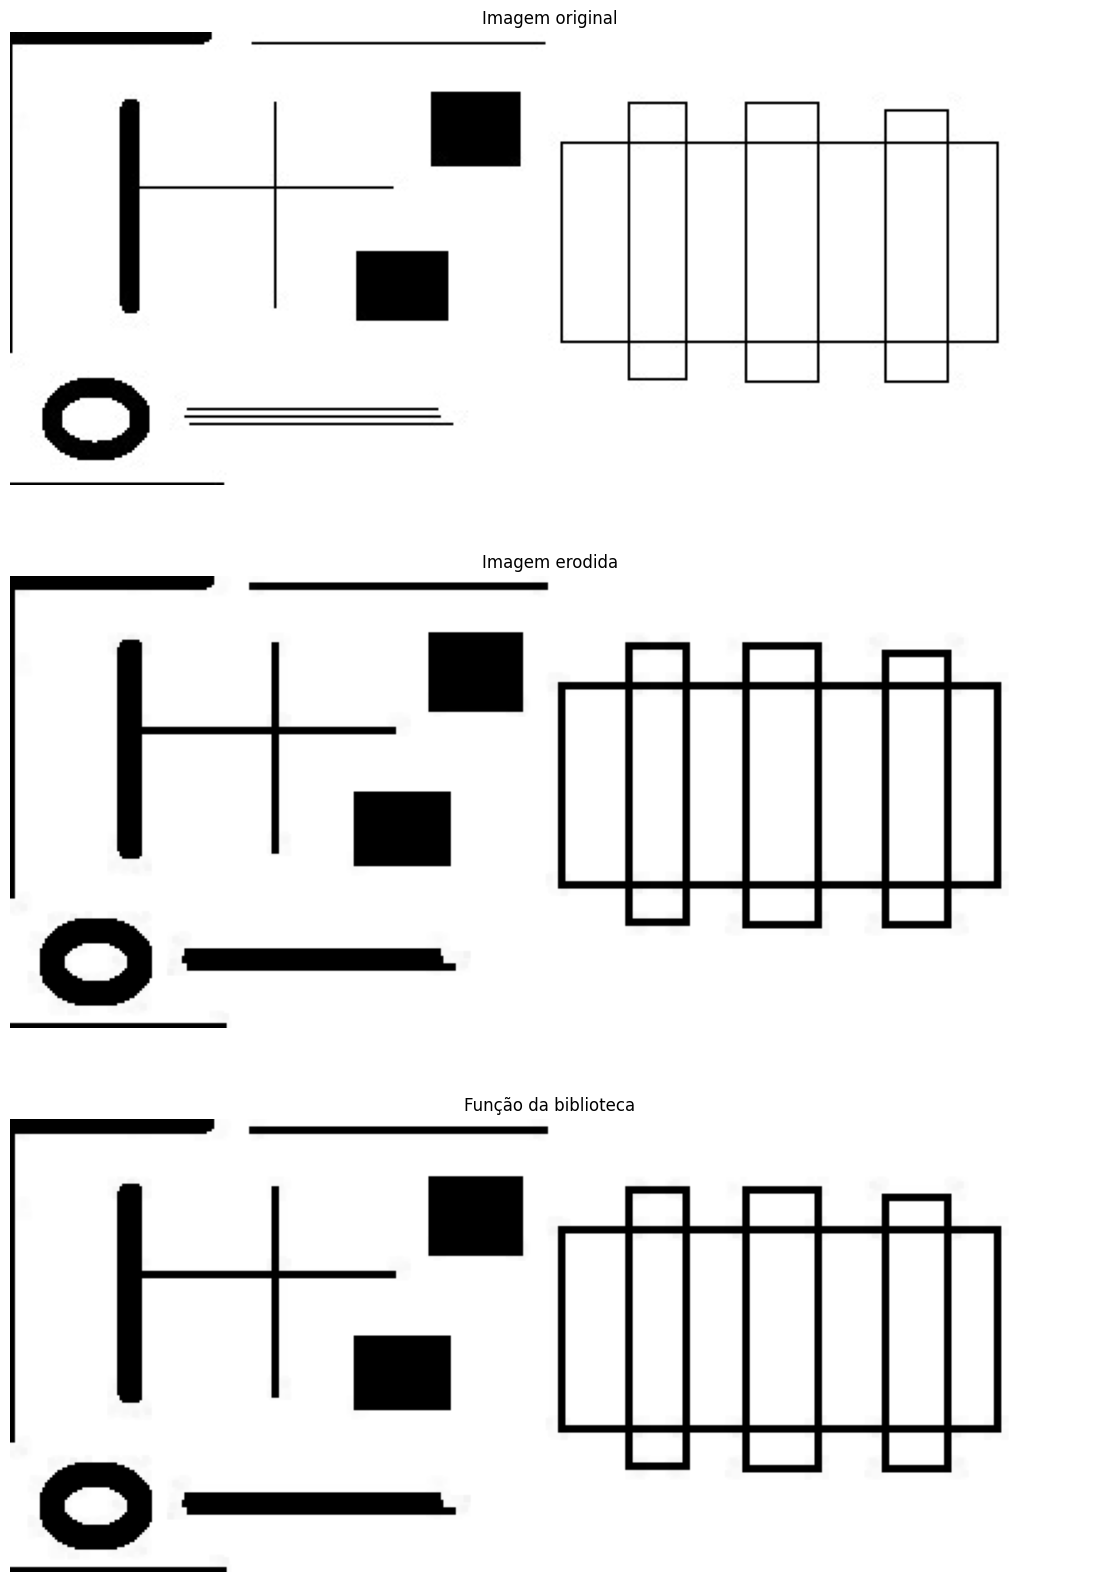

In [12]:
# DEFINE O TAMANHO DA FIGURA EM POLEGADAS, AJUSTANDO O COMPRIMENTO E A ALTURA EXIBIDOS

figura = plt.figure(figsize=(20, 20))

# DEFININDO A FORMA DE EXIBIÇÃO, COM TRÊS IMAGENS LADO A LADO

linhas = 3
colunas = 1

# CRIANDO O PRIMEIRO SUBPLOT A SER EXIBIDO

figura.add_subplot(linhas, colunas, 1)  # POSIÇÃO DO SUBPLOT
# Define os dados que serão exibidos como imagem, e neste caso, imagem monocromática devido ao cmap='gray'
plt.imshow(imagem, cmap = 'gray')
# Desabilita os valores exibidos nos eixos numéricos
plt.axis('off')
plt.title("Imagem original") # Título da imagem

# CRIANDO O SEGUNDO SUBPLOT A SER EXIBIDO DA MESMA FORMA QUE O ANTERIOR

figura.add_subplot(linhas, colunas, 2)
plt.imshow(imagem_copia_2, cmap = 'gray')
plt.axis('off')
plt.title("Imagem erodida") # Para o processo de erosão
# plt.title("Imagem dilatada") # Para o processo de dilatação

# CRIANDO O TERCEIRO SUBPLOT A SER EXIBIDO DA MESMA FORMA QUE OS ANTERIORES

figura.add_subplot(linhas, colunas, 3)
plt.imshow(imagem_transformada_biblioteca, cmap = 'gray')
plt.axis('off')
plt.title("Função da biblioteca")

# EXIBIÇÃO DOS SUBPLOTS

plt.show()